# Ejercicios prácticos - Módulo 1

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz
from ipywidgets import interact
import ipywidgets as ipyw

### 1. El estadístico Bruno de Finetti declaró que "Las probabilidades no existen". Cómo se vincula este enunciado con el modelo BetaBinomial que hemos visto?

Según lo que investigué sobre el enunciado el autor hace referencia al hecho de que **las probabilidades no son inherentes al evento al que se las asocia**, más bien representan un grado de creencia que tenemos nosotros sobre dicho evento. Si decimos que hay 70% de chances que llueva mañana **esto no representa la probabilidad real**, representa nuestra creencia sobre ese evento según lo que se ha visto antes.

El modelo **BetaBinomial** que vimos incorpora esta idea de "lo que hemos visto antes" mediante el uso de **priors**, más especificamente la distribución $Beta$, la cual se puede interpretar como experimentos anteriores de tiradas de monedas y nos permite luego actualizar nuestras "probabilidades" sobre el sesgo de la moneda según vamos incorporando información.

### 2. Edwin Jaynes, físico, declaró que la teoría de probabilidad es la lógica de la ciencia. Discutí este enunciado.

Encontré esta versión desarrollada del enunciado en internet:

_Sí, el físico Edwin Thompson Jaynes efectivamente afirmó que la teoría de la probabilidad es la "lógica de la ciencia". Él argumentaba que la probabilidad no solo se aplica a situaciones de azar, sino que también sirve como una herramienta fundamental para la inferencia científica y la toma de decisiones racionales en cualquier campo. 
Jaynes desarrolló esta idea en su libro póstumo, "Probability Theory: The Logic of Science". En él, argumentaba que la probabilidad, especialmente en su forma bayesiana, proporciona un marco lógico para actualizar nuestras creencias a la luz de nueva evidencia._

Se puede notar que **sus declaraciones se relacionan profundamente con las ideas que presenta esta materia** y el como podemos actualizar nuestras creencias con respecto a una hipótesis haciendo uso del enfoque bayesiano.

### 3. Usá pz.Beta().plot_interactive() para explorar distintas combinaciones de parámetros de la distribución Beta. ¿Cuál es el efecto de los parámetros $\alpha$ y $\beta$?

No logré usar la función propuesta pero voy a generar algunos gráficos con parámetros diferentes para ver como se comporta la distribución:

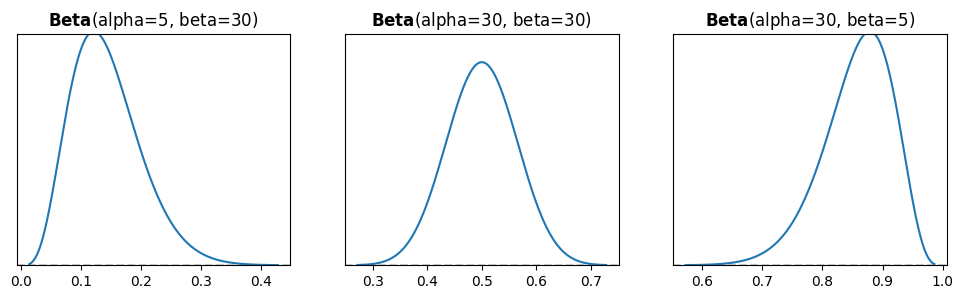

In [9]:
_, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

params = [(5, 30), (30, 30), (30,5)]

for (a, b), ax  in zip(params, axes):
    ax = pz.Beta(a, b).plot_pdf(ax=ax, legend="title")
    ax.set_ylim(0, 7)

Podemos ver que el rol de los parámetros $\alpha$ y $\beta$ en la distribución es generar desplazamientos en las mismas. Más concretamente:

* Si **$\alpha$ es menor que $\beta$** entonces vemos un **desplazamiento hacia la izquierda**
* Si **$\alpha$ es mayor que $\beta$** entonces vemos un **desplazamiento hacia la derecha**
* **Si $\alpha$ es igual que $\beta$** entonces vemos **centralidad**

### 4. Interpretá los parámetros de una distribución Beta, $\alpha$ y $\beta$ en términos de su PDF (probability density function). Analizá solo el caso de $\alpha >= 1$ y $\beta >= 1$

Si miramos la PDF de la distribución Beta tenemos que es de la forma:

$$p(\theta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

Observando sus parámetros en el contexto de la ecuación y fijándonos solamente en la parte funcional (es decir que no nos fijamos en la función gamma) podemos ver que es bastante similar a una distribución binomial: **$\alpha$ y $\beta$ se pueden interpretar como éxitos y fracasos**.

### 5. La media de la distribución Beta es $\frac{\alpha}{\alpha+\beta}$. Cuál es la media de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

Para este caso tenemos que nuestra posterior es de la forma:

$$p(\theta \mid y) = \operatorname{Beta}(\alpha_{a priori} + y, \beta_{a priori} + N - y)$$

Reemplazando por los valores especificados tenemos que:

$$p(\theta \mid y) = \operatorname{Beta}(2 + 6, 5 + 10 - 6) = \operatorname{Beta}(8, 9)$$

Por lo tanto tenemos que:

$$\mu_{posterior} = \frac{8}{8+9} = \frac{8}{17} \approxeq 0.47$$

### 6. La varianza de la distribución Beta es $\frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$. ¿Cuál es la varianza de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

Ya que son los mismos datos que el caso anterior podemos aprovechas el hecho de conocer la distribución posterior. Entonces tenemos que:

$$\sigma^2_{posterior} = \frac{8.9}{(8+9)^2(8+9+1)} = \frac{72}{5202} \approxeq 0.0138$$

### 7. Contrastá los resultados de los puntos anteriores usando la función `mean` y `var` de la distribución Beta de PreliZ.

In [12]:
posterior_beta_binomial = pz.Beta(8, 9)

print(f'Media de la posterior: {posterior_beta_binomial.mean()}')
print(f'Varianza de la posterior: {posterior_beta_binomial.var()}')

Media de la posterior: 0.47058823529411764
Varianza de la posterior: 0.01384083044982699


### 8. PreliZ tiene una función llamada [maxent](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.unidimensional.maxent). Explicá que hace.

Es una función que permite hallar una distribución basándose en el **principio de no mentir**: máxima entropía/incertidumbre dada la información disponible (**maxent** es un diminutivo de "max entropy" en inglés). En este caso la información disponible serían las características que especifiquemos ("Que sea mayor que 0", "Que el 70% de su información se concentre entre A y B") y la máxima incertidumbre está en la distribución devuelta ya que esta no asume nada más allá de lo que especificamos.

### 9. Conocimiento experto indica que un parámetro debe ser positivo y que el 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

En este caso podemos hacer uso de la distribución **Gamma**, la cual se utiliza para modelar variables aleatorias continuas y positivas. Usemos `maxent` especificando las características de este parámetro:

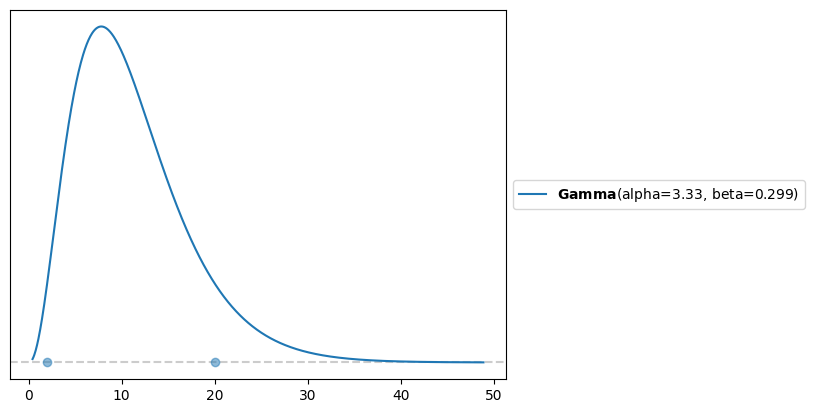

In [21]:
pz.maxent(distribution= pz.Gamma(), lower= 2, upper= 20, mass= 0.9)
plt.show()

Podemos ver que el resultado fue una distribución $\operatorname{Gamma}(3.33, 0.299)$.

### 10. Conocimiento experto indica que un parámetro debe ser positivo con media 6 y 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

Se puede volver a hacer uso de la distribución **Gamma**, pero ahora usando el parámetro `mu` de la función que la representa en preliz:

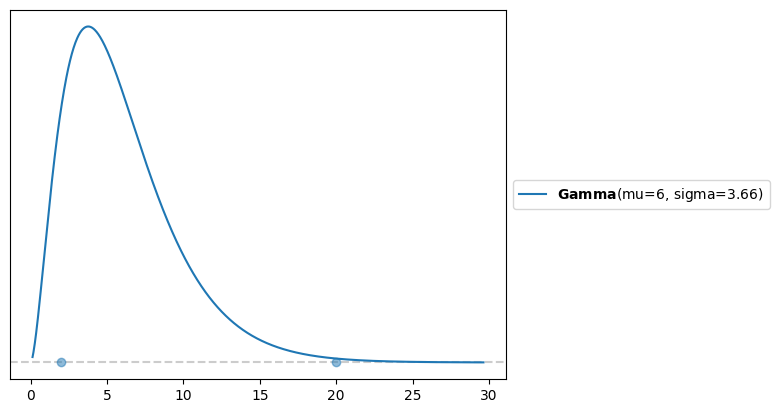

In [27]:
pz.maxent(distribution= pz.Gamma(mu= 6), lower= 2, upper= 20, mass= 0.9)
plt.show()

Podemos ver que el resultado fue una distribución $\operatorname{Gamma}(2.61, 0.268)$.

### 11. Usá la siguiente función para explorar diversas combinaciones de _priors_ y _likelihoods_. Enunciá las conclusiones que consideres más relevantes

In [ ]:
def a_posteriori_grilla(grilla=10, a=1, b=1, caras=6, tiradas=9):
    grid = np.linspace(0, 1, grilla)
    prior = pz.Beta(a, b).pdf(grid)
    likelihood = pz.Binomial(n=tiradas, p=grid).pdf(caras)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('caras = {}\ntiradas = {}'.format(caras, tiradas))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['a priori', 'likelihood', 'a posteriori'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(a_posteriori_grilla, grilla=ipyw.IntSlider(min=2, max=100, step=1, value=15), a=ipyw.FloatSlider(min=1, max=7, step=1, value=1), b=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), caras=ipyw.IntSlider(min=0, max=20, step=1, value=6), tiradas=ipyw.IntSlider(min=0, max=20, step=1, value=9));

interactive(children=(IntSlider(value=15, description='grilla', min=2), FloatSlider(value=1.0, description='a'…